### Setup notebook paramaters

In [1]:
import numpy as np
import pandas as pd
import os
import sys

from kde.location_project.kde_2d import (
    kdnearest, 
    learn_nearest_neighbors_bandwidth, 
    plot_kde,
    sample_from_kde
)
from kde.location_project.cmp import (
    calc_cmp,
    plot_scatter
)
from emd import emd

import matplotlib.pyplot as plt
import plotly
from plotly.offline import (
    download_plotlyjs, init_notebook_mode, plot, iplot
)
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline
init_notebook_mode(connected=True)

sys.setrecursionlimit(10000)
# # turn off SettingWithCopyWarning
# pd.options.mode.chained_assignment = None 

%load_ext autoreload
%autoreload 2

np.random.seed(1234)
directory = os.path.join("..", "data") 

# Earth Mover's Distance

## Explore on simulated data

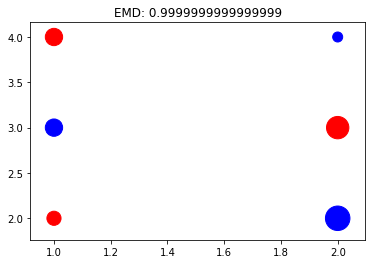

In [2]:
from emd import emd

X = np.array([[1,2], [1,4], [2,3]])
X_wts = np.atleast_2d(np.array([0.2, 0.3, 0.5])).T
Y = np.array([[1,3], [2,2], [2,4]])
Y_wts = np.atleast_2d(np.array([0.3, 0.6, 0.1])).T

# EMD is symmetric
assert(emd(X, Y, X_weights=X_wts, Y_weights=Y_wts) \
    == emd(Y, X, X_weights=Y_wts, Y_weights=X_wts))

# plot it
plt.scatter(X[:,0], X[:,1], s=X_wts*1000, c='red')
plt.scatter(Y[:,0], Y[:,1], s=Y_wts*1000, c='blue')
plt.title("EMD: {}".format(emd(X, Y, X_weights=X_wts, Y_weights=Y_wts)))
plt.show()

### Simulate from a 2d normal & add noise for second point pattern

EMD scales linearly as the distance between points increases.

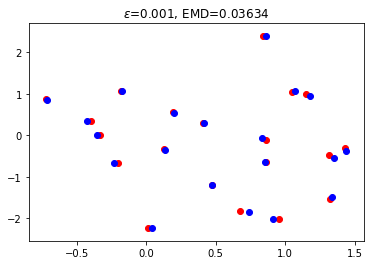

In [3]:
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[1, 0], [0, 1]],
    size=20
)
eps = 0.001
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=20
)
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.title("$\epsilon$={}, EMD={}".format(eps, round(emd(X, Y),5)))
plt.show()

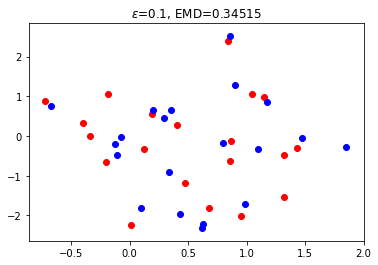

In [4]:
eps = 0.1
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=20
)
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.title("$\epsilon$={}, EMD={}".format(
    eps, 
    round(emd(X, Y),5))
)
plt.show()

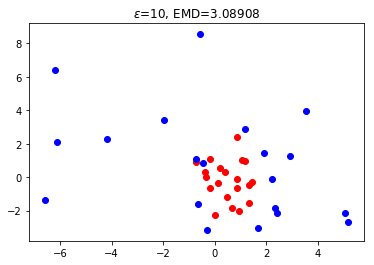

In [5]:
eps = 10
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=20
)
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.title("$\epsilon$={}, EMD={}".format(
    eps, 
    round(emd(X, Y),5))
)
plt.show()

### Unequal number of points

Appears to only have an impact when $\epsilon$ is small, which could result in larger distances for same-source pairs.

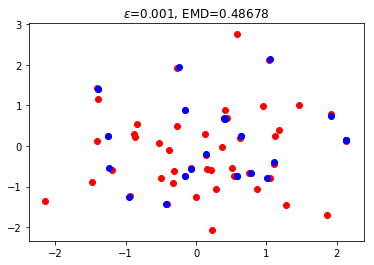

In [6]:
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[1, 0], [0, 1]],
    size=50
)
eps = 0.001
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=50
)
Y = Y[np.random.randint(0,len(X),25), :]
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.title("$\epsilon$={}, EMD={}".format(eps, round(emd(X, Y),5)))
plt.show()

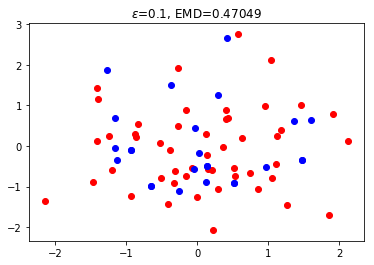

In [7]:
eps = 0.1
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=50
)
Y = Y[np.random.randint(0,len(X),25), :]
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.title("$\epsilon$={}, EMD={}".format(eps, round(emd(X, Y),5)))
plt.show()

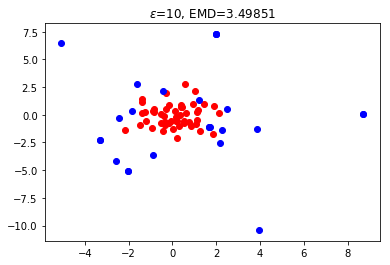

In [8]:
eps = 10
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=50
)
Y = Y[np.random.randint(0,len(X),25), :]
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.title("$\epsilon$={}, EMD={}".format(eps, round(emd(X, Y),5)))
plt.show()

### Incorporating weights

Similar effect as unequal numbers of points, but higher variability across simulated point sets when $\epsilon$ is low (not shown in this notebook).

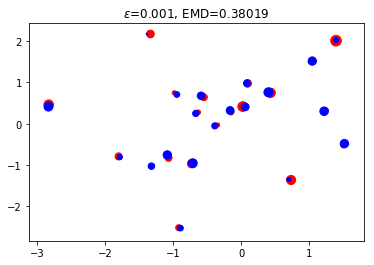

In [9]:
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[1, 0], [0, 1]],
    size=20
)
X_wts = np.random.uniform(0,1,20)
X_wts /= sum(X_wts)
eps = 0.001
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=20
)
Y_wts = np.random.uniform(0,1,20)
Y_wts /= sum(Y_wts)
plt.scatter(X[:,0], X[:,1], s=X_wts*1000, c='red')
plt.scatter(Y[:,0], Y[:,1], s=Y_wts*1000, c='blue')
plt.title("$\epsilon$={}, EMD={}".format(
    eps, 
    round(emd(X, Y, X_weights=X_wts, Y_weights=Y_wts),5))
)
plt.show()

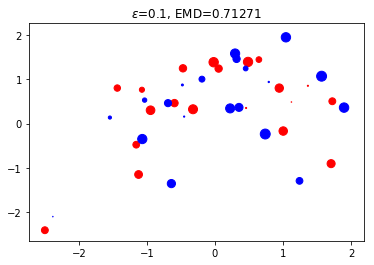

In [10]:
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[1, 0], [0, 1]],
    size=20
)
X_wts = np.random.uniform(0,1,20)
X_wts /= sum(X_wts)
eps = 0.1
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=20
)
Y_wts = np.random.uniform(0,1,20)
Y_wts /= sum(Y_wts)
plt.scatter(X[:,0], X[:,1], s=X_wts*1000, c='red')
plt.scatter(Y[:,0], Y[:,1], s=Y_wts*1000, c='blue')
plt.title("$\epsilon$={}, EMD={}".format(
    eps, 
    round(emd(X, Y, X_weights=X_wts, Y_weights=Y_wts),5))
)
plt.show()

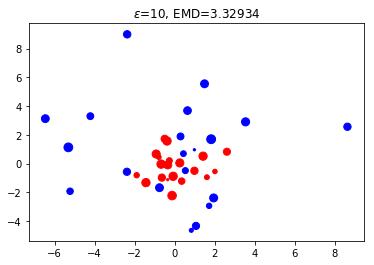

In [11]:
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[1, 0], [0, 1]],
    size=20
)
X_wts = np.random.uniform(0,1,20)
X_wts /= sum(X_wts)
eps = 10
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=20
)
Y_wts = np.random.uniform(0,1,20)
Y_wts /= sum(Y_wts)
plt.scatter(X[:,0], X[:,1], s=X_wts*1000, c='red')
plt.scatter(Y[:,0], Y[:,1], s=Y_wts*1000, c='blue')
plt.title("$\epsilon$={}, EMD={}".format(
    eps, 
    round(emd(X, Y, X_weights=X_wts, Y_weights=Y_wts),5))
)
plt.show()

# CMP with EMD

### Load the visits data & test integrity

In [12]:
mpp = pd.read_csv(os.path.join(directory, "mpp_visits_month0a_month1b_n20.csv"))
pop_deduped = pd.read_csv(os.path.join(directory, "parcel_ass-oc-visits-ass_events_deduped_bw.csv"))
pop_kde_data = np.array(pop_deduped[['uid', 'lon', 'lat', 'bw']])


In [13]:
plot_scatter(mpp=mpp, df=pop_deduped, uid=1)

In [14]:
import time
from pprint import pprint

start = time.clock()
pprint(calc_cmp(mpp, pop_kde_data, userA=1, n_sim=10, k=1, prnt=True))
end = time.clock()
print("\nTime:", round(end - start, 2), "s")

USERS {1}
Number of unique locations (across A & B): 31
Number of locations in common (in both A & B): 5
Number of matched users: 11
Number of sample points: 1253
Sum of weights: 1.0

{'cmp_emd': 0.0,
 'cmp_mean': 0.0,
 'cmp_median': 0.4,
 'obs_emd': 2.850063343599591,
 'obs_mean': 1.418316904988363,
 'obs_med': 0.21305388248339802}

Time: 1.95 s


In [15]:
start = time.clock()
pprint(calc_cmp(mpp, pop_kde_data, userA=1, userB=4, n_sim=100, k=1, prnt=True))
end = time.clock()
print("\nTime:", round(end - start, 2), "s")

USERS {1, 4}
Number of unique locations (across A & B): 27
Number of locations in common (in both A & B): 0
Number of matched users: 21
Number of sample points: 2463
Sum of weights: 1.0

{'cmp_emd': 1.0,
 'cmp_mean': 1.0,
 'cmp_median': 1.0,
 'obs_emd': 21.760652812939888,
 'obs_mean': 17.873691478407267,
 'obs_med': 13.960645286040574}

Time: 7.42 s


### Same-source pairs

In [17]:
# PARAMETERS
n_sim = 2
k = 1  # which nearest neighbor to use in distance computation
users = mpp['uid'].unique()
same_src = []

for u in users:
    print("User", u)
    tmp = calc_cmp(
        mpp, pop_kde_data, userA=u, n_sim=n_sim, k=k
    )
    tmp['a'] = u
    tmp['b'] = u
    same_src.append(tmp)
        
out = pd.DataFrame.from_dict(same_src)
out
# out.to_csv(os.path.join(directory, "cmp_visits_emd_month0a_month1b_n20.csv"), index=False)

User 1
User 2
User 3
User 4
User 5
User 6
User 7
User 8
User 9
User 10
User 11
User 12
User 13
User 14
User 15


KeyError: 'n_matches'

### Different-source pairs (random sample)

In [ ]:
# dif_scr = {}
# for u1 in users:
#     print('A - USER {}'.format(u1))
#     for u2 in users:
#         print('   B - USER {}'.format(u2))
#         tmp = calc_cmp(
#             mpp, pop_kde_data, userA=u1, userB=u2, n_sim=n_sim, k=k
#         )
#         tmp['a'] = u1
#         tmp['b'] = u2
#         diff_src.append(tmp)

In [34]:
from kde.location_project.cmp import get_individual_component

criteria_A = (mpp["m"] == "a") & (mpp["uid"] == u)
criteria_B = (mpp["m"] == "b") & (mpp["uid"] == u)
indiv_data, indiv_kde_data = get_individual_component(
    df=mpp, users={u,u}, criteria=criteria_A | criteria_B, prnt=True
)

USERS {223}
Number of unique locations (across A & B): 24
Number of locations in common (in both A & B): 5
Number of matched users: 1
Number of sample points: 118
Sum of weights: 1.0



In [33]:
loc_set = mpp.loc[criteria_A | criteria_B]["location_id"].unique()
samp_sp = mpp.loc[~mpp.uid.isin({15})]
matches = []
for u in samp_sp.uid.unique():
    tmp = samp_sp.loc[samp_sp.uid == u]
    shared_locs = np.intersect1d(loc_set, tmp["location_id"].unique())
    if len(shared_locs) > 0:
        matches.append({"uid": u, "n_matches": len(shared_locs), "n_events": len(tmp)})
# matches = pd.DataFrame(matches)
matches

[]